# Visu 2: Computing width: width with pixel variance

In this notebook, we use a movie to compute the width of the hypha by computing the variance on each pixel over time along the section of the hypha.

Carefull: the profile_line function doesn't have the same coordinate order as matplot lib.
(x, y) in matplot lib becomes (y, x) in profile_line

## Setup

In [1]:
from amftrack.util.sys import storage_path
from amftrack.util.plot import extract_kymograth, variance_over_time_on_segment
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

from skimage.measure import profile_line

%matplotlib notebook

/home/ipausers/kahane/Wks/AMFtrack/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Defining the region

In [2]:
image_path = os.path.join(
    storage_path,
    "width2/20220324_Plate907_029/Img/Basler_acA4112-30um__40044625__20220324_112622932_0004.tiff",
)

In [3]:
im = image.imread(image_path)
print(im.shape)

(3000, 4096)


In [4]:
x1, y1 = 1900, 2575
x2, y2 = 2700, 2360

In [5]:
np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

828.3869868606097

<IPython.core.display.Javascript object>


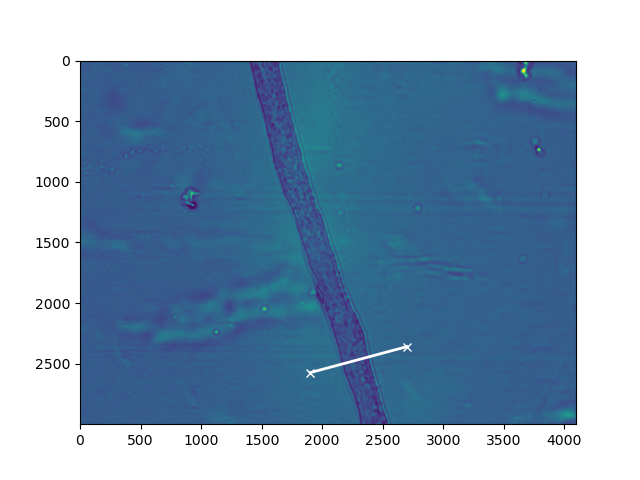

In [11]:
plt.imshow(im)
plt.plot(x1, y1, marker="x", color="white")
plt.plot(x2, y2, marker="x", color="white")

plt.plot([x1, x2], [y1, y2], color="white", linewidth=2)

### Exctract profile

In [7]:
profile = profile_line(
    im, src=[y1, x1], dst=[y2, x2], linewidth=1
)  # careful with (y, x) and not (x, y)
plt.plot(list(range(len(profile))), profile)

In [8]:
profile.shape

(830,)

## Debug

<IPython.core.display.Javascript object>


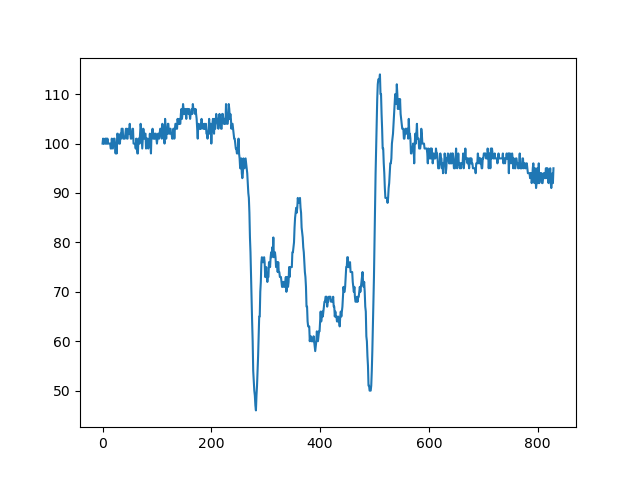

In [12]:
plt.plot(list(range(len(profile))), profile)
plt.show()

## Extraction

In [24]:
kymo = extract_kymograth(
    storage_path + "width2/20220324_Plate907_030/Img",
    x1,
    y1,
    x2,
    y2,
    pattern=r"Basler_acA4112-30um__40044625__20220324_112738811_00",
)

In [26]:
variance_on_segment = variance_over_time_on_segment(
    storage_path + "width2/20220324_Plate907_030/Img",
    x1,
    y1,
    x2,
    y2,
    pattern=r"Basler_acA4112-30um__40044625__20220324_112738811_00",
)

In [22]:
kymo.shape

(99, 830)

<IPython.core.display.Javascript object>


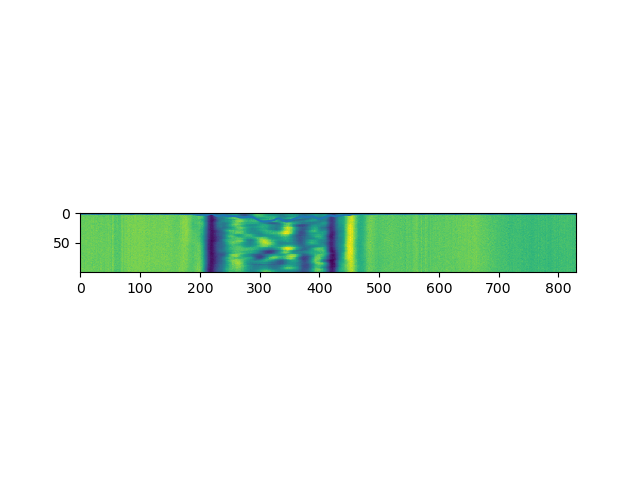

In [25]:
plt.imshow(kymo)

### Analyse

<IPython.core.display.Javascript object>


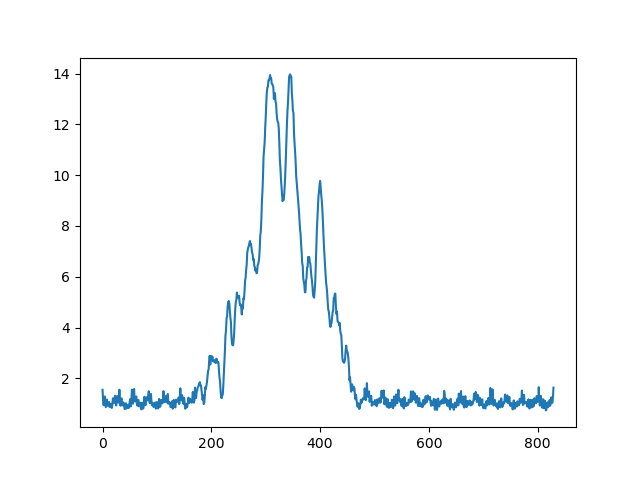

In [28]:
plt.plot(variance_on_segment)